## Gradient Descent

First of all, lets look at the example.

In [ ]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(-10,20,0.5)
y = np.array([(5 + rnd.random()) * el + 10 for el in x])

In [ ]:
plt.scatter(x,y,marker= ".",color= "red",label= "Function 1")
plt.grid(True)
plt.show()

Lets assume that our dependance is linear.<br>
${y_j = \beta_0 + \beta_1 \cdot x_j + \epsilon_j: j \in \{1,...n\}}$<br>
So the model we want to approximate is: ${\hat{y}_j = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_j}$<br>
To do it, we will: 
1. Compute the gradient of the Cost-Function
2. Use it iteratively to access the min point, where the Cost-Function has ***global*** minimum.
3. Necessary to check if this minimum is ***global***<br>
Lets start our theoretical experiment! (but first - bathroom and shaving)

### Block 1
1. ${\hat{y}_j = \hat{\beta}_0 + \hat{\beta}_1 * x_j + \hat{\beta}_2 \cdot x_j^{2}}$
2. ${e_j^2 = \left(\hat{y}_j - y_j\right)^2 => \sum_{j = 1}^n{\left(\hat{y}_j - y_j\right)^2} =>\newline CostFunction\left(\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2\right) = \sum_{j = 1}^n{\left(\hat{\beta}_0 + \hat{\beta}_1 \cdot x_j + \hat{\beta}_2 \cdot x_j^{2} - y_j\right)^2} \rightarrow \min{\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2}}$
3. ${\frac{\partial CF\left(\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2\right)}{\partial {\hat{\beta}}} = \left(\frac{\partial CF\left(\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2\right)}{\partial \hat{\beta}_0}, \frac{\partial CF\left(\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2\right)}{\partial \hat{\beta}_1},\frac{\partial CF\left(\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2\right)}{\partial \hat{\beta}_2}\right)}$
4. Gradient Descent abstract view: ${{z}_{n + 1} = {z}_{n} - \alpha \cdot \frac{\partial CF\left(\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2\right)}{\partial {\hat{\beta}}}\left({z}_{n}\right)}$
5. So we need the initial vector of ${\beta}$ be defined.

In [8]:
# -----------------------------------------------------------------------------------------
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def f(x):
    return 3 * np.exp(x) / (x**2 + x + 1)
def f_drivative(f,x):
    b = 1e-3
    return (f(x + b) - f(x - b)) / (2 * b)

In [157]:
x = np.linspace(-3,4,100)
y = np.array([f(el) for el in x])
y_d = np.array([f_drivative(f,el) for el in x])

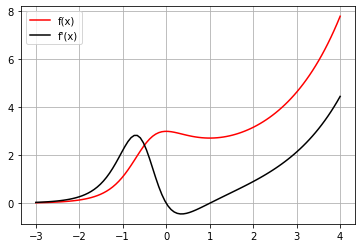

In [158]:
plt.plot(x,y,color= "Red",label= "f(x)")
plt.plot(x,y_d,color= "Black",label= "f'(x)")
plt.legend(loc= "best")
plt.grid(True)
plt.show()

In [175]:
a = 1e-2
v = 0
x_min = 4
x_min_next = x_min - a * f_drivative(f,x_min)
buf = []

In [180]:
k = 0
while abs(x_min - x_min_next) >= 1e-20 and k <= 100_000:
    k += 1
    buf.append(x_min)
    x_min = x_min_next
    v = 0.9 * v - a * f_drivative(f,x_min_next)
    x_min_next = x_min_next + v
x_min_next

0.9999999999998533

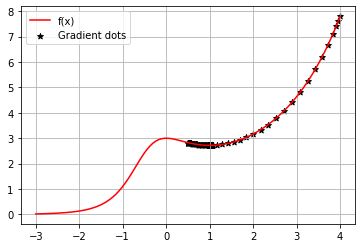

In [181]:
buf = np.array(buf)
plt.plot(x,y,color= "red",label= "f(x)")
plt.scatter(buf,np.array([f(el) for el in buf]),color= "Black",marker= "*",label= "Gradient dots")
plt.plot(x,y_d,color= "Orange",label= "f'(x)")
plt.legend(loc= "best")
plt.grid(True)
plt.show()